In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: lxml>=4.5.1 in c:\programdata\anaconda3\lib\site-packages (from yfinance) (4.6.3)

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=c11bb6b95b56bf6fc53fcfcd9bc5cd504e11cc73f8ea28d9214ff47bc55eb264
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\ec\cc\c1\32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=5d5bf49d444b9d6944b32e289599923db17db99f9ecbc8b6a95e23a860296e96
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [4]:
import yfinance as yf

In [6]:
ticker_data=yf.Ticker('SPY')

In [11]:
ticker_df=ticker_data.history(period='1d',start='2015-01-01', end='2020-01-01')

In [12]:
ticker_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-31,183.818544,183.995299,181.520697,181.653259,130333800,0.0,0
2015-01-02,182.395607,182.837499,180.451268,181.556000,121465900,0.0,0
2015-01-05,180.442447,180.619202,177.950180,178.277176,169632600,0.0,0
2015-01-06,178.604206,179.160995,175.749582,176.598022,209151400,0.0,0
2015-01-07,178.012046,179.160970,177.534808,178.798615,125346700,0.0,0


In [13]:
ticker_df=ticker_df[['Close']]

In [14]:
ticker_df.head()

,Close
Date,
2014-12-31,181.653259
2015-01-02,181.556000
2015-01-05,178.277176
2015-01-06,176.598022
2015-01-07,178.798615


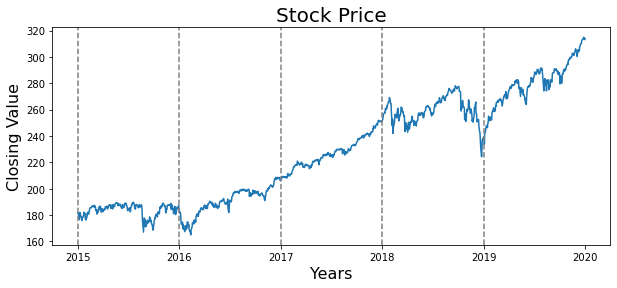

In [16]:
plt.figure(figsize=(10,4))
plt.plot(ticker_df.Close)
plt.title('Stock Price',fontsize=20)
plt.ylabel('Closing Value',fontsize=16)
plt.xlabel('Years',fontsize=16)
for year in range(2015,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),linestyle='--',color='grey')

In [21]:
fd = ticker_df.Close.values[1:]-ticker_df.Close.values[:-1]

In [22]:
fd.shape

(1258,)

In [23]:
fd=np.concatenate([fd,[0]])#Adding 0 at the end to have same number of rows

In [24]:
fd.shape

(1259,)

In [25]:
fd

array([-0.09725952, -3.27882385, -1.67915344, ..., -1.73596191,
        0.76065063,  0.        ])

In [26]:
ticker_df["FD"]=fd

In [27]:
ticker_df.head()

,Close,FD
Date,,
2014-12-31,181.653259,-0.097260
2015-01-02,181.556000,-3.278824
2015-01-05,178.277176,-1.679153
2015-01-06,176.598022,2.200592
2015-01-07,178.798615,3.172806


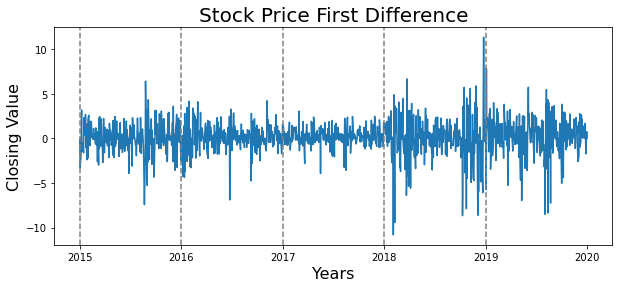

In [29]:
plt.figure(figsize=(10,4))
plt.plot(ticker_df.FD)
plt.title('Stock Price First Difference',fontsize=20)
plt.ylabel('Closing Value',fontsize=16)
plt.xlabel('Years',fontsize=16)
for year in range(2015,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),linestyle='--',color='grey')

In [37]:
ticker_df.Close.diff()

Date
2014-12-31         NaN
2015-01-02   -0.097260
2015-01-05   -3.278824
2015-01-06   -1.679153
2015-01-07    2.200592
                ...   
2019-12-24    0.009705
2019-12-26    1.667725
2019-12-27   -0.078003
2019-12-30   -1.735962
2019-12-31    0.760651
Name: Close, Length: 1259, dtype: float64

In [39]:
ticker_df.FD

Date
2014-12-31   -0.097260
2015-01-02   -3.278824
2015-01-05   -1.679153
2015-01-06    2.200592
2015-01-07    3.172806
                ...   
2019-12-24    1.667725
2019-12-26   -0.078003
2019-12-27   -1.735962
2019-12-30    0.760651
2019-12-31    0.000000
Name: FD, Length: 1259, dtype: float64

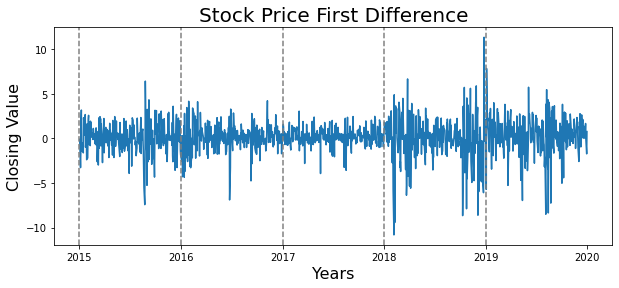

In [46]:
plt.figure(figsize=(10,4))
plt.plot(ticker_df.Close.diff())
plt.title('Stock Price First Difference',fontsize=20)
plt.ylabel('Closing Value',fontsize=16)
plt.xlabel('Years',fontsize=16)
for year in range(2015,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),linestyle='--',color='grey')

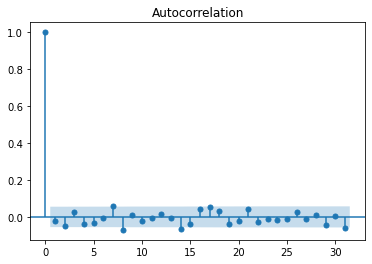

In [44]:
acf_plot = plot_acf(ticker_df.Close.diff().dropna())

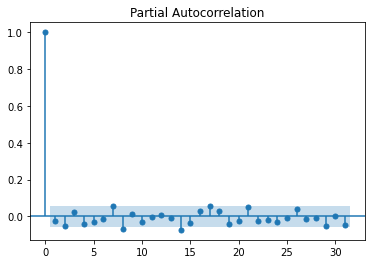

In [47]:
pacf_plot=plot_pacf(ticker_df.Close.diff().dropna())

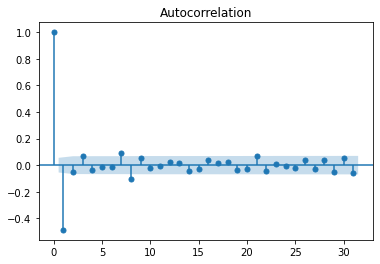

In [45]:
acf_plot = plot_acf(ticker_df.Close.diff().diff().dropna())

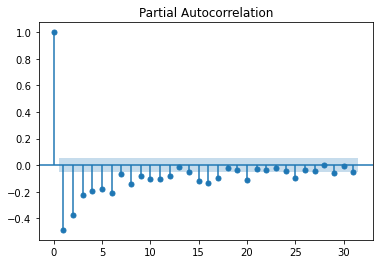

In [48]:
pacf_plot = plot_pacf(ticker_df.Close.diff().diff().dropna())

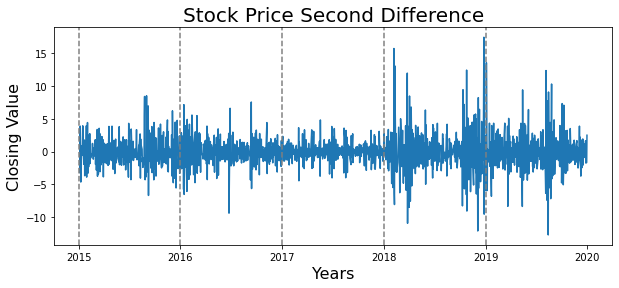

In [41]:
plt.figure(figsize=(10,4))
plt.plot(ticker_df.Close.diff().diff())
plt.title('Stock Price Second Difference',fontsize=20)
plt.ylabel('Closing Value',fontsize=16)
plt.xlabel('Years',fontsize=16)
for year in range(2015,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),linestyle='--',color='grey')